<a href="https://colab.research.google.com/github/varunpusarla/Intelligent-Document-Processing/blob/main/Invoice_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and Importing the Ultralytics library

In [ ]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 30.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Saving the current working directory path to a variable

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Importing our training and testing data that we saved in the roboflow cloud platform for fast and easy access


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets



!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ztrni2ePZEBOO7ZJZMUk")
project = rf.workspace("varun-yvyoy").project("invoice-processing-nl2cz")
dataset = project.version(1).download("yolov8")



/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=a452e1afd9c64de3bf67583d7722cbfe7821c2bee6cdd39b1120fc7a513b99c3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.123, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Invoice-Processing-1 in yolov8:: 100%|██████████| 512/512 [00:00<00:00, 1763.63it/s]


Training our YOLO model and setting the epochs to 100 and plots=True to showcase our training metrics

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 51.9MB/s]
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Invoice-Processing-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=T

In [ ]:
from IPython.display import display, Image

**Training Metrics**

/content


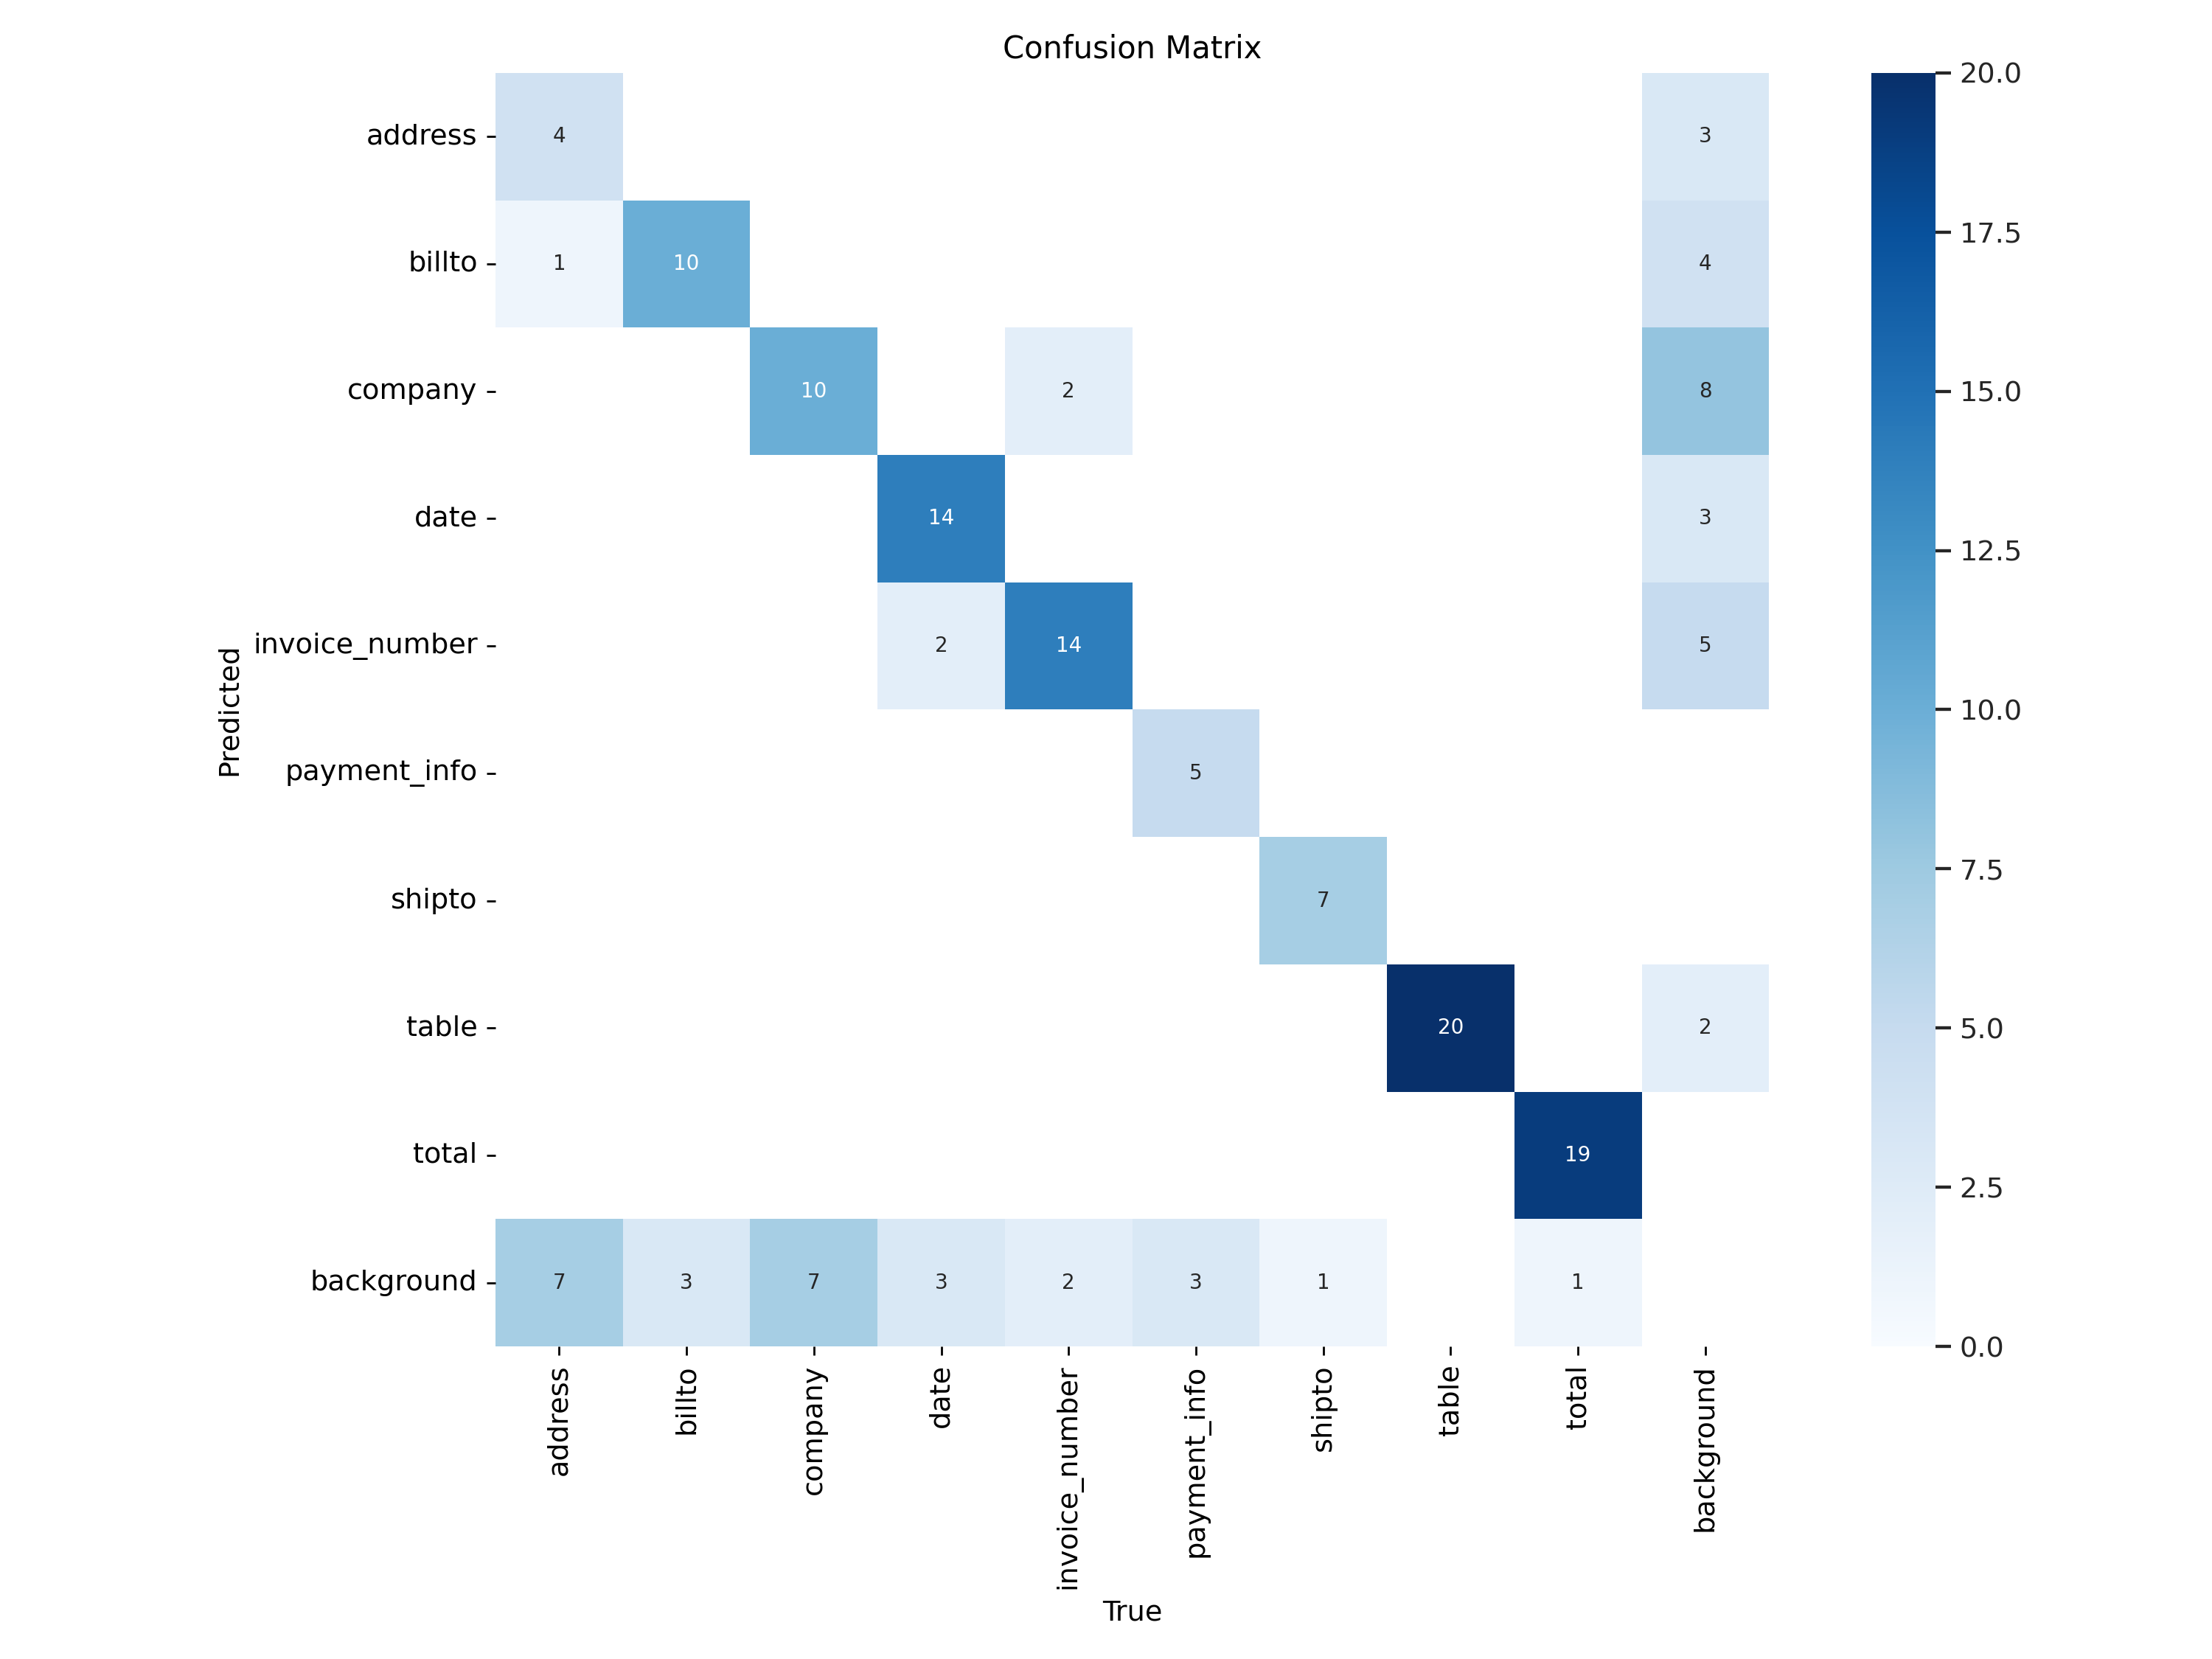

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


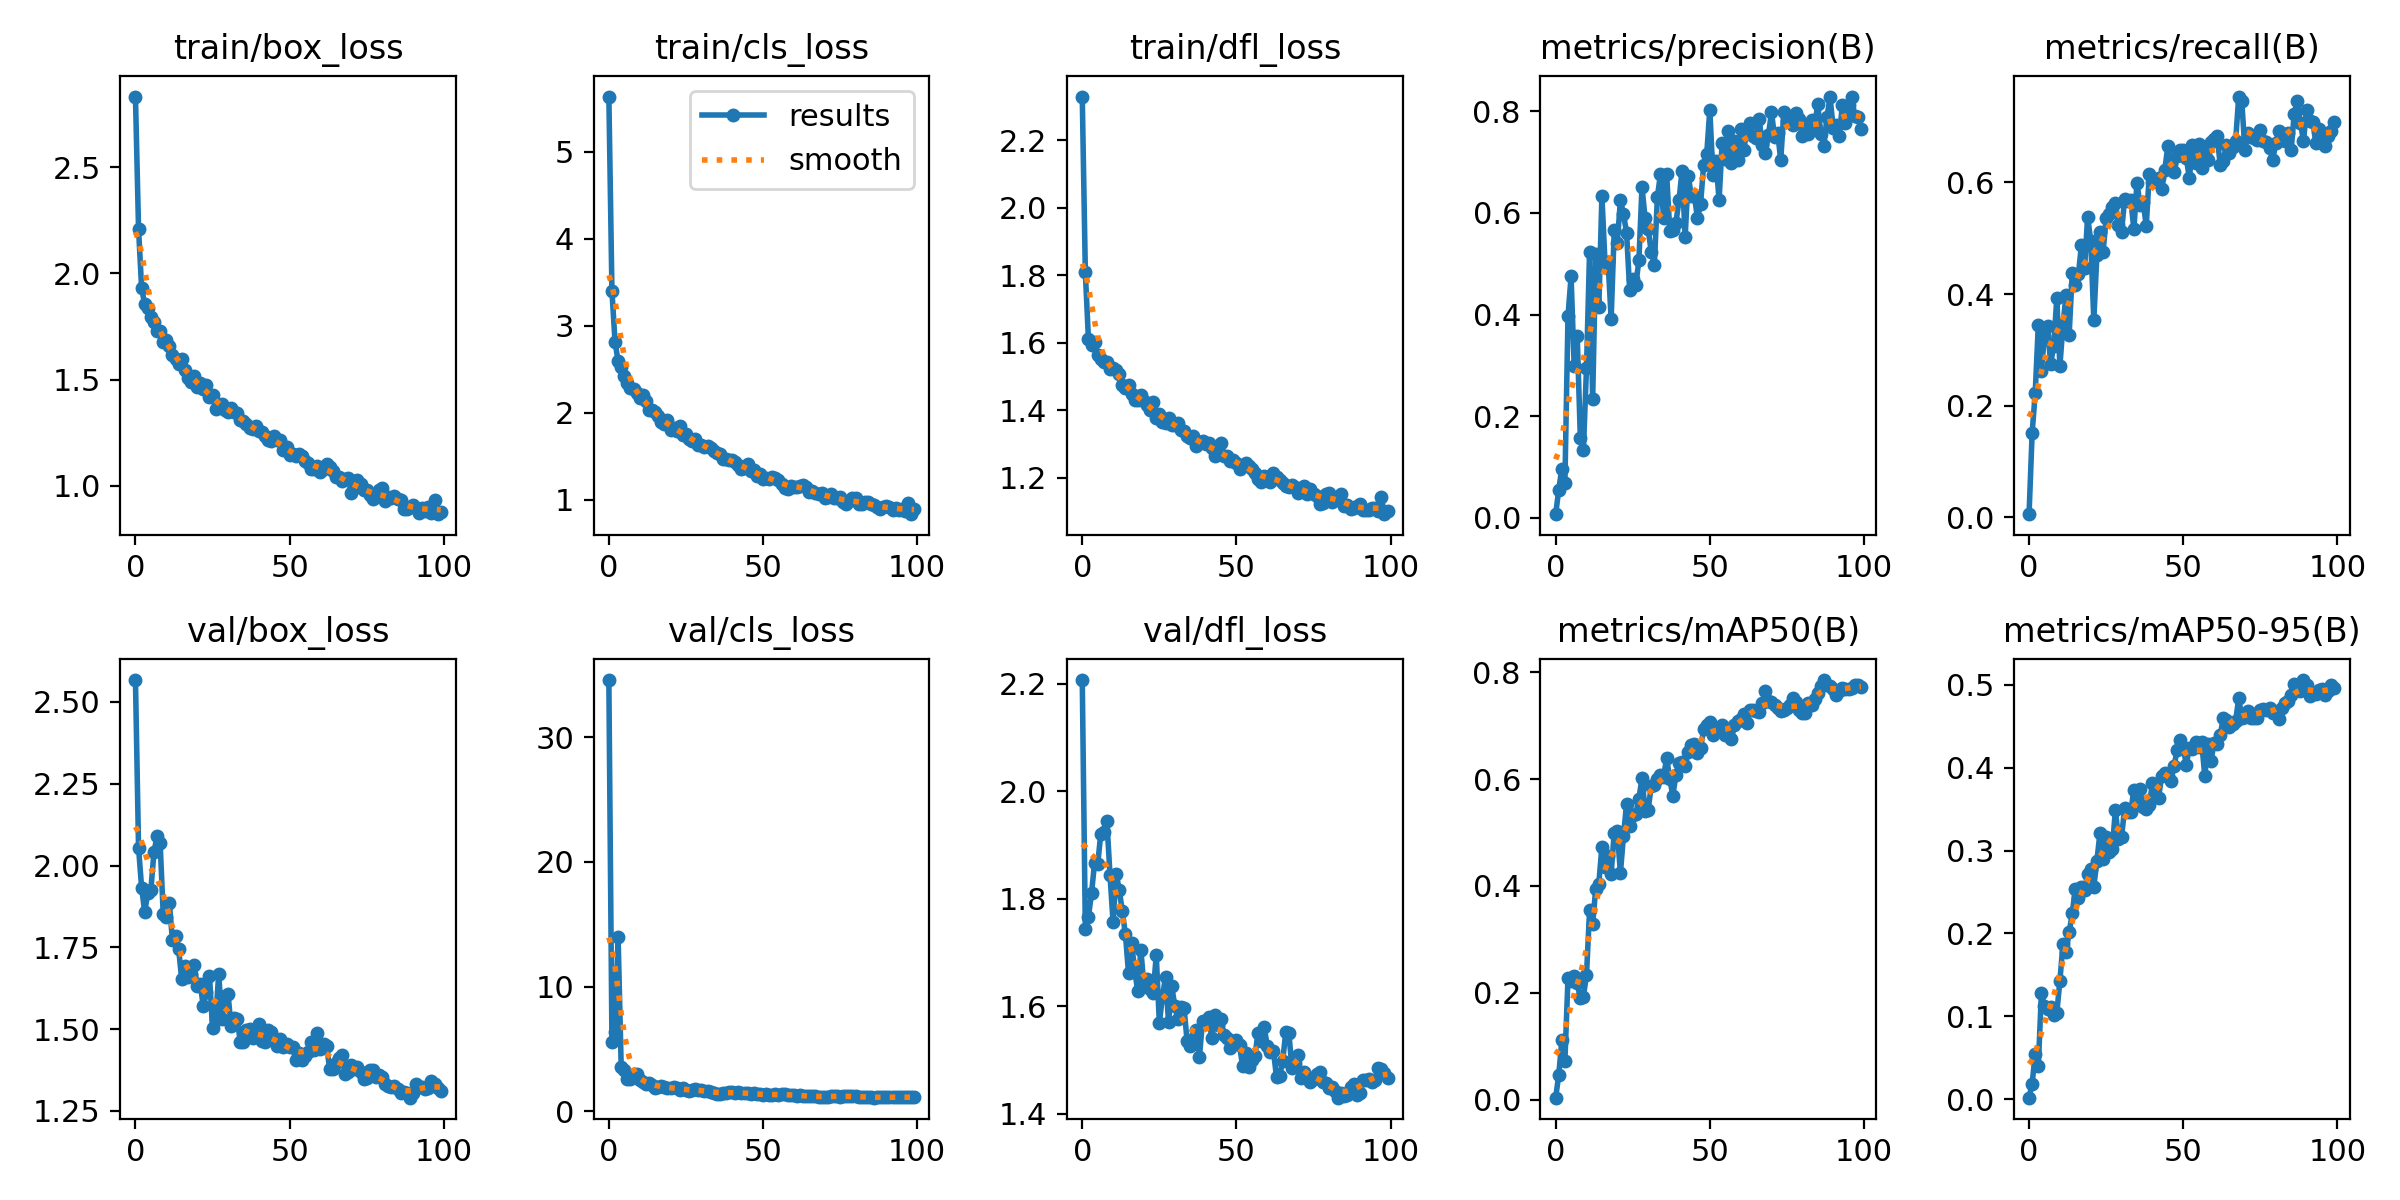

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Predictions on our validation dataset

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients
val: Scanning /content/datasets/Invoice-Processing-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.91it/s]
                   all         20        135      0.737      0.754      0.775      0.507
               address         20         12      0.546      0.402      0.434      0.166
                billto         20         13      0.685      0.846      0.795      0.544
               company         20         17      0.471      0.577       0.49      0.189
                  date         20         19      0.733      0.723      0.746      0.392
        invoice_number         20         18       0.57      0.735      0.769      0.385
          payment_info         20    

/content


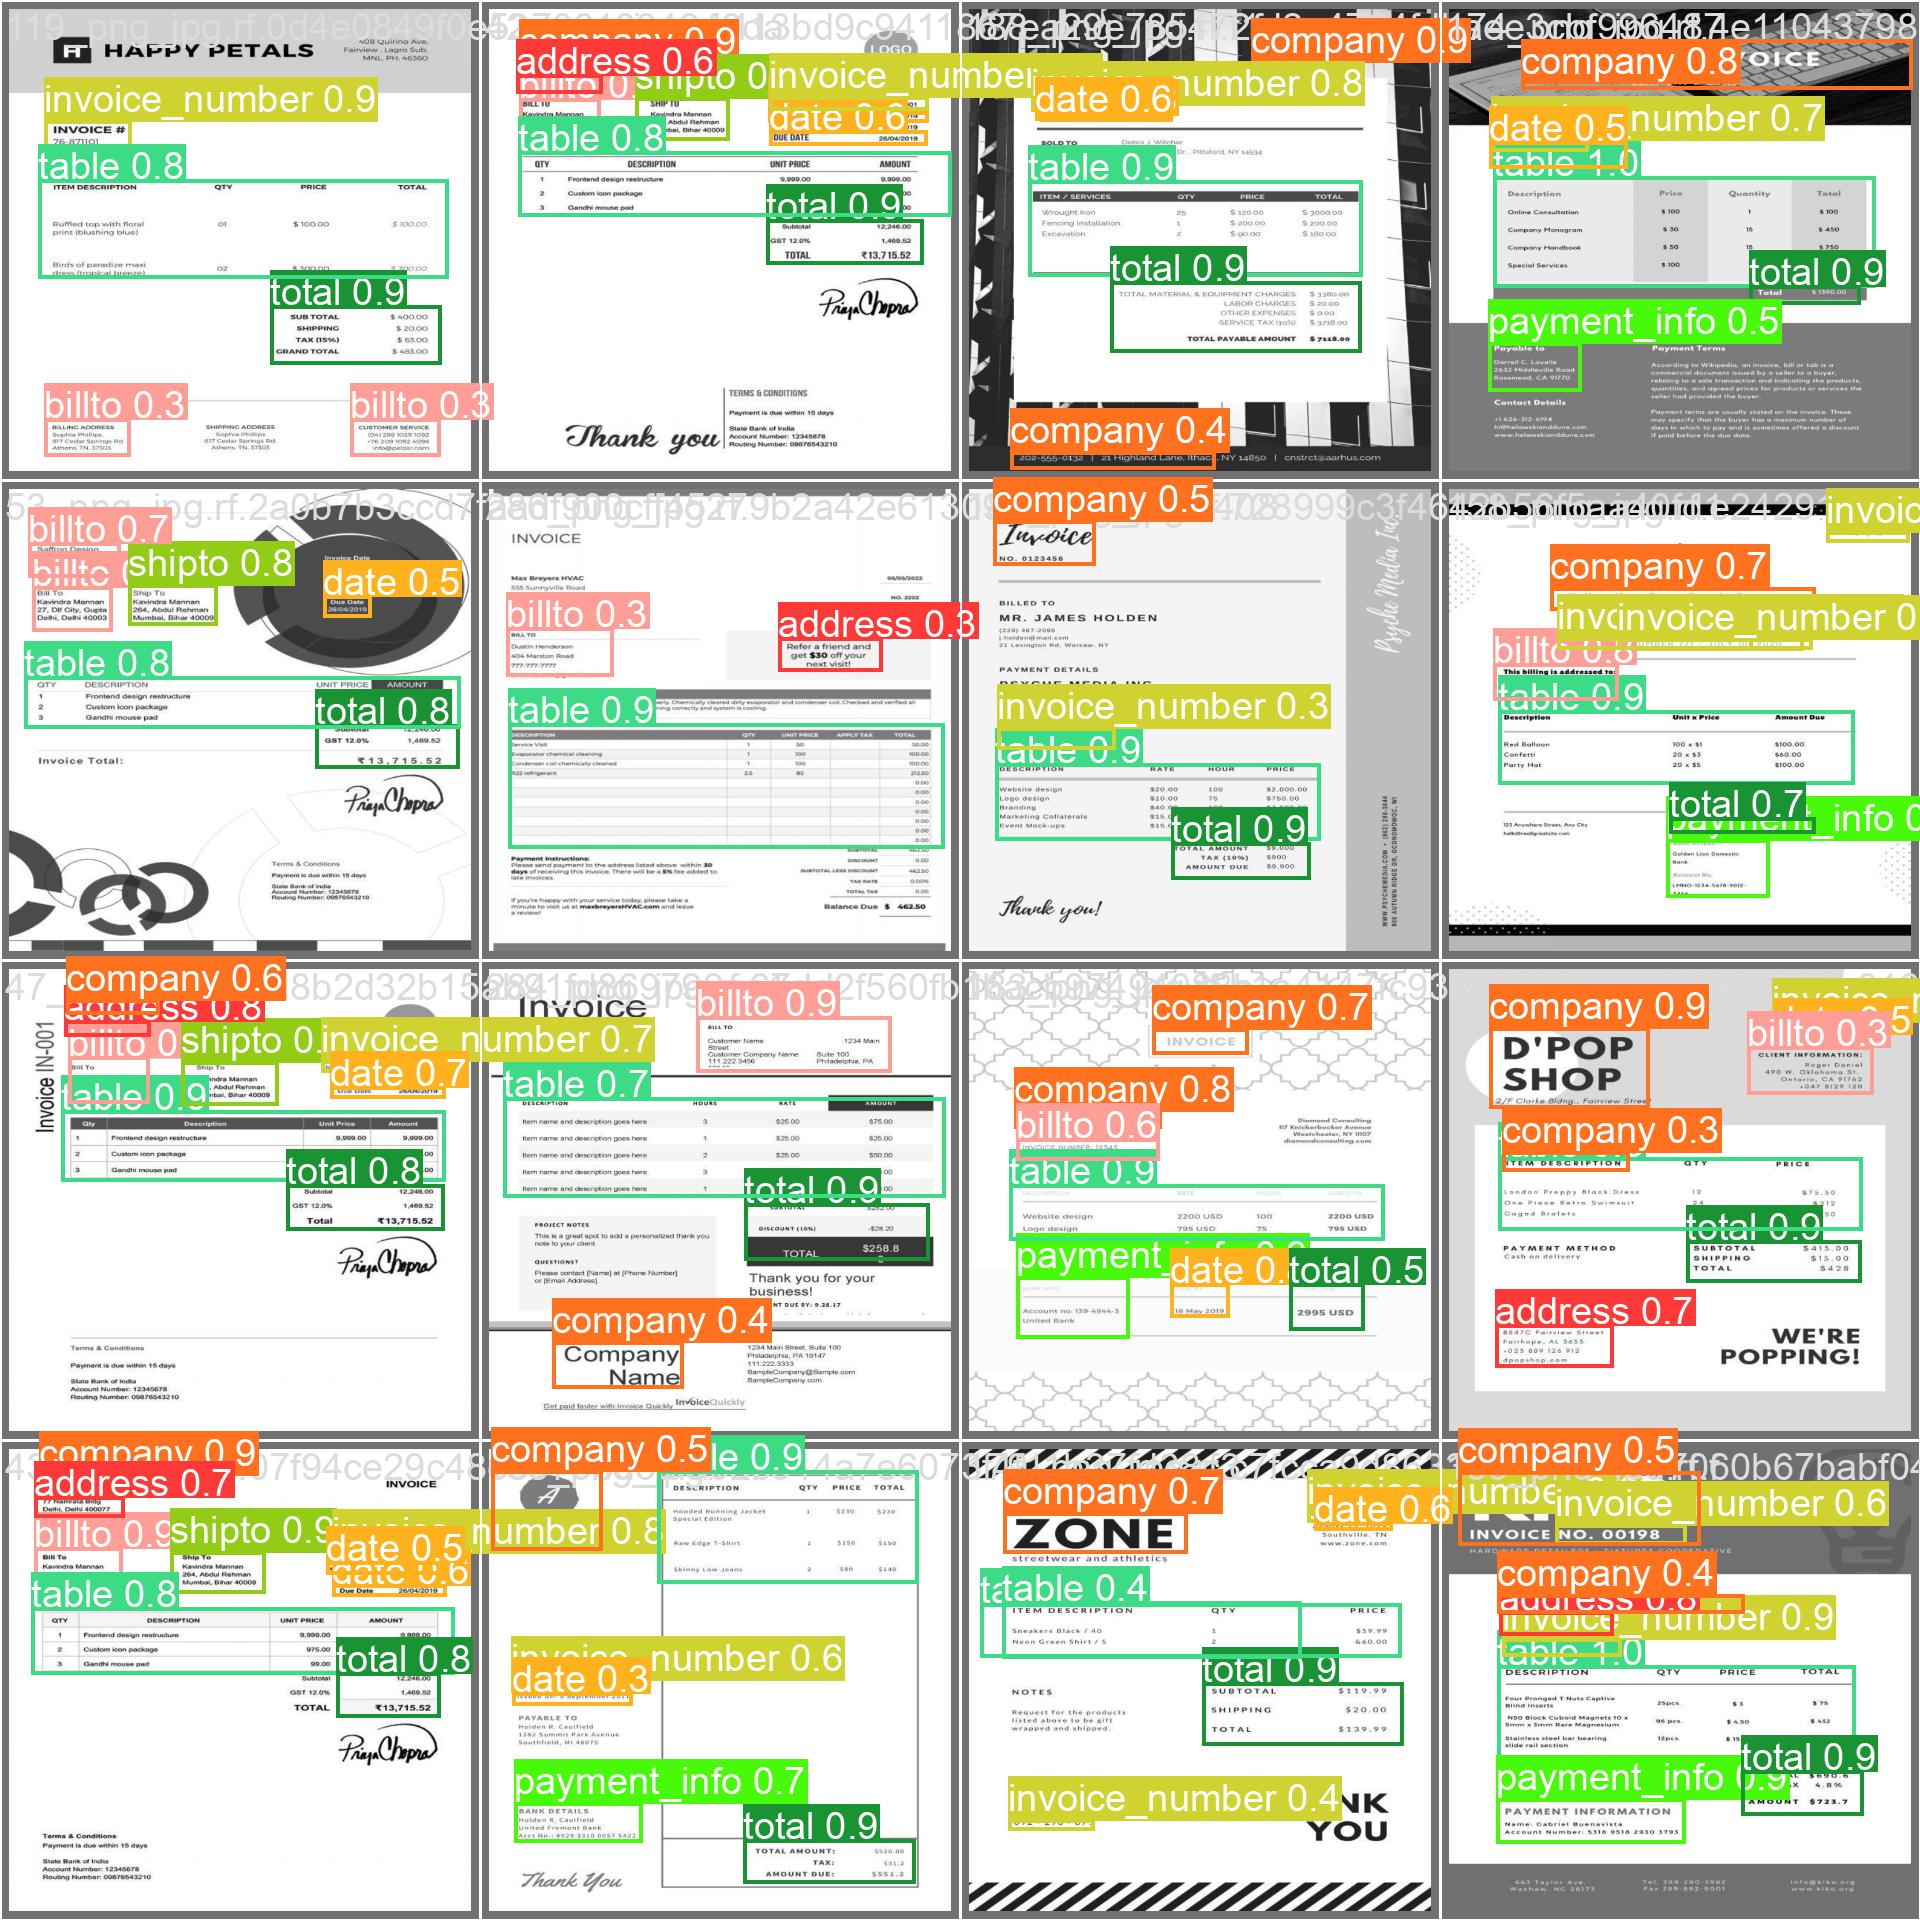

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients

image 1/11 /content/datasets/Invoice-Processing-1/test/images/128_png_jpg.rf.8de9fb837e3f3a675e6b161ad64602cf.jpg: 800x800 2 companys, 1 invoice_number, 1 table, 25.3ms
image 2/11 /content/datasets/Invoice-Processing-1/test/images/130_png_jpg.rf.748316ef3da0f903fbe134c7a5ec377a.jpg: 800x800 2 addresss, 1 company, 1 date, 1 invoice_number, 1 payment_info, 1 table, 2 totals, 24.8ms
image 3/11 /content/datasets/Invoice-Processing-1/test/images/131_png_jpg.rf.f97cfdb8788ea3109b5da6b3f064215e.jpg: 800x800 2 billtos, 1 company, 1 date, 2 invoice_numbers, 1 shipto, 1 table, 1 total, 24.6ms
image 4/11 /content/datasets/Invoice-Processing-1/test/images/145_png_jpg.rf.56614466614519bfd6e11b583df139d8.jpg: 800x800 1 address, 1 billto, 1 company, 1 date, 1 invoice_number, 1 payment_info, 1 table, 1 total, 23.2ms
image 5/11 /content/da

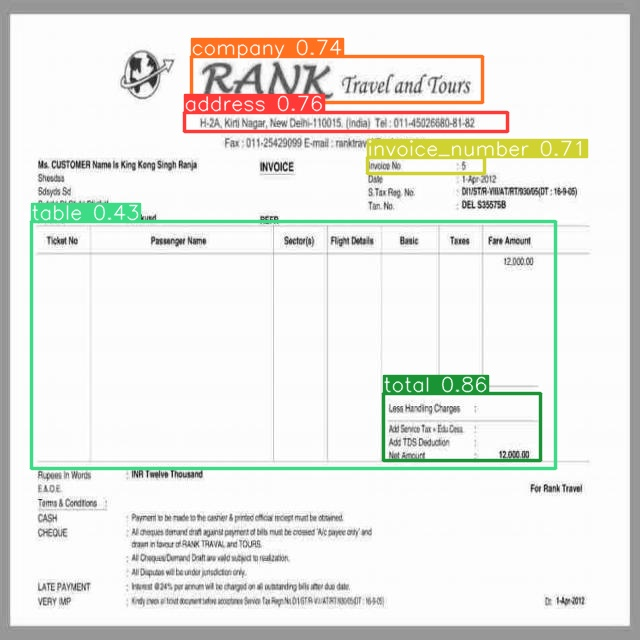

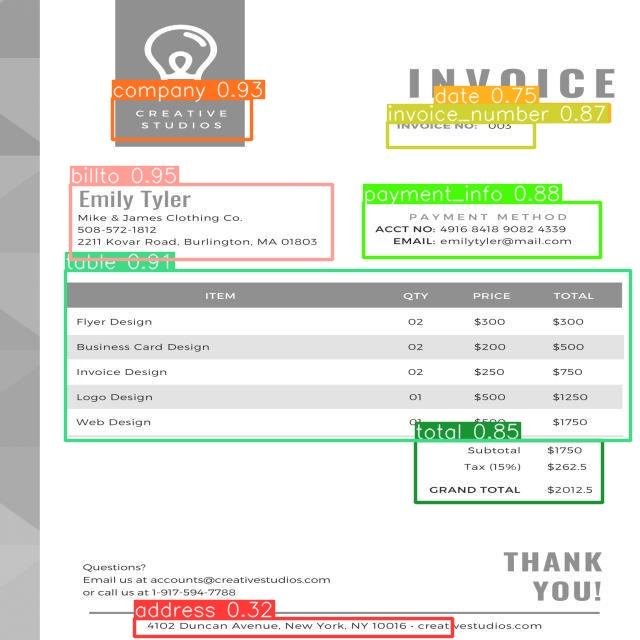

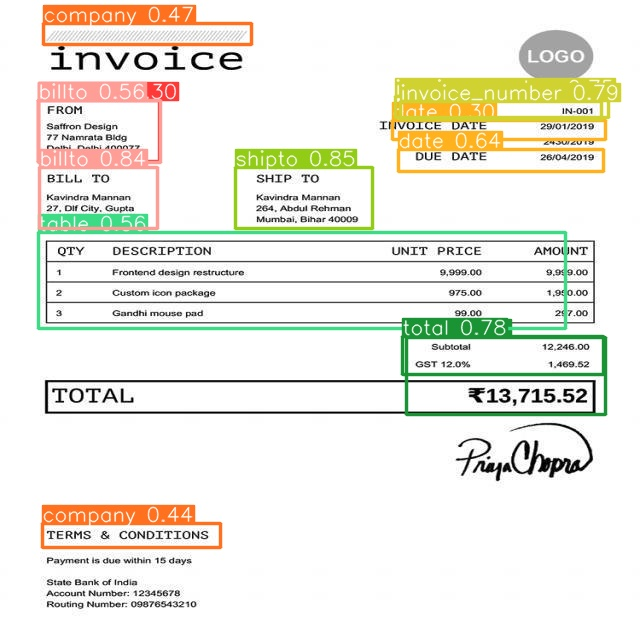

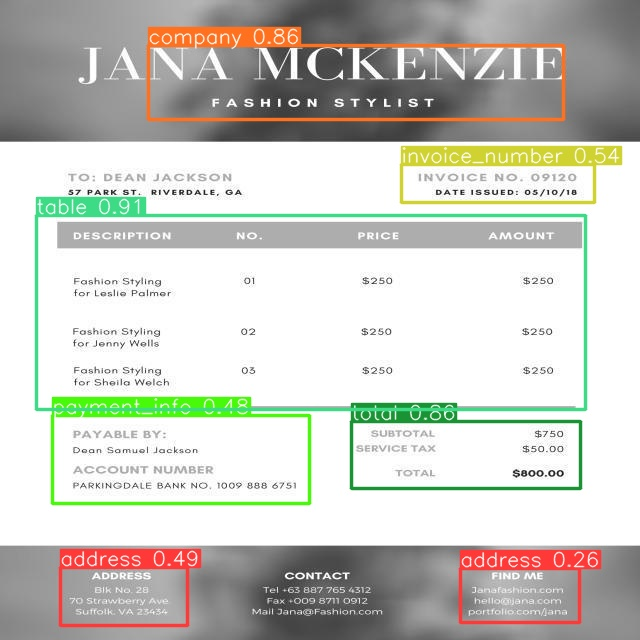

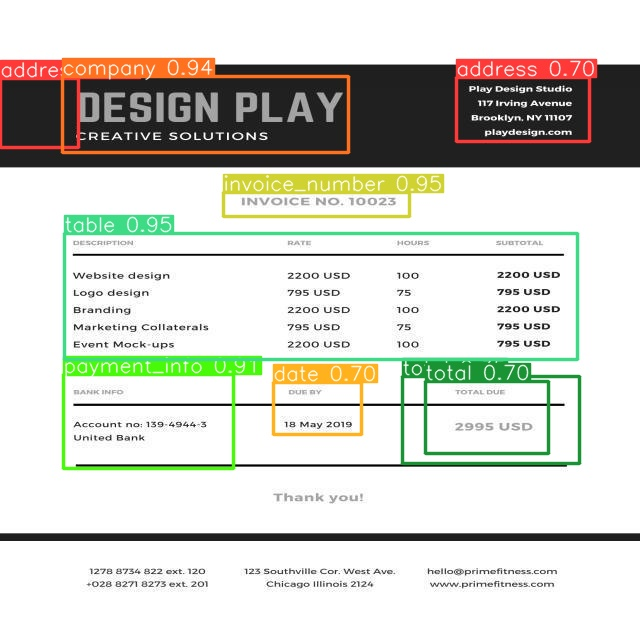

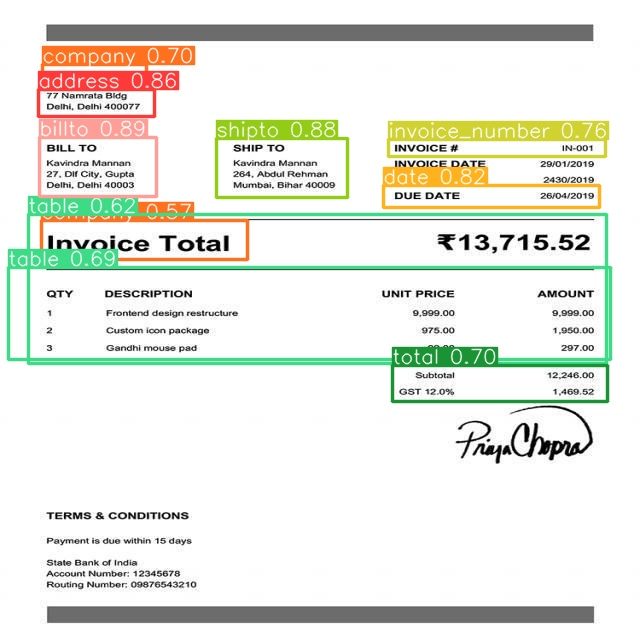

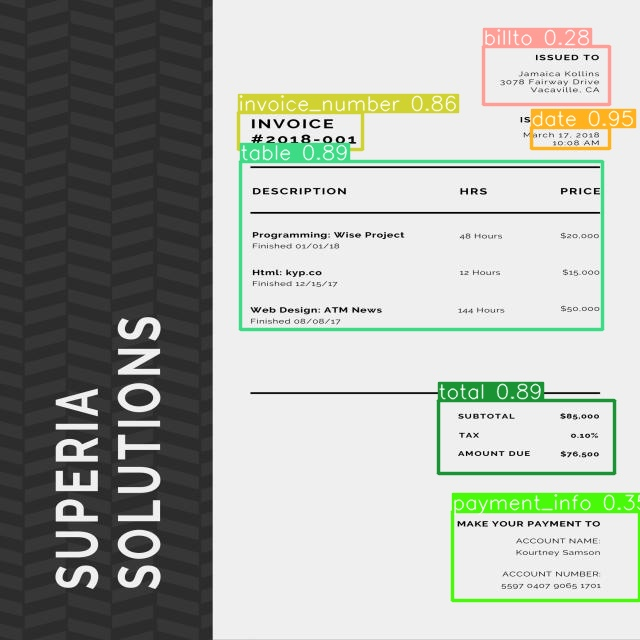

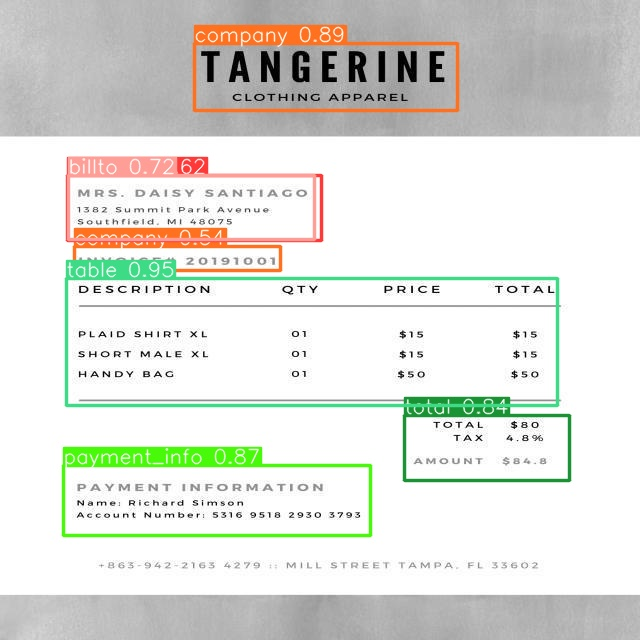

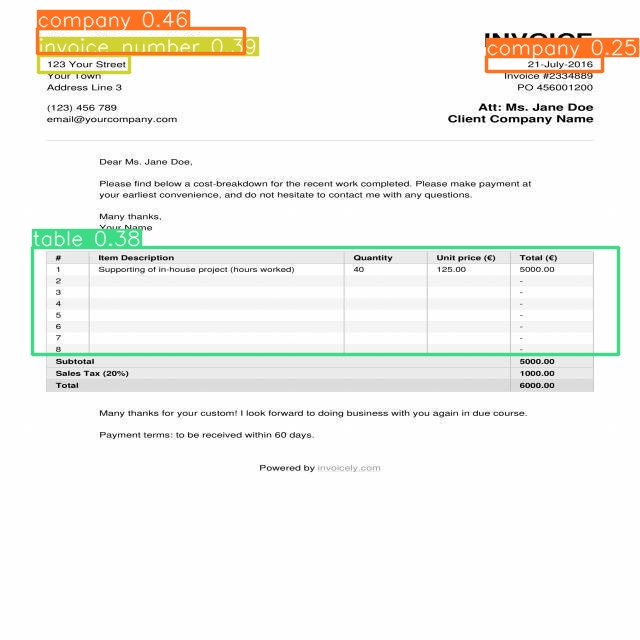

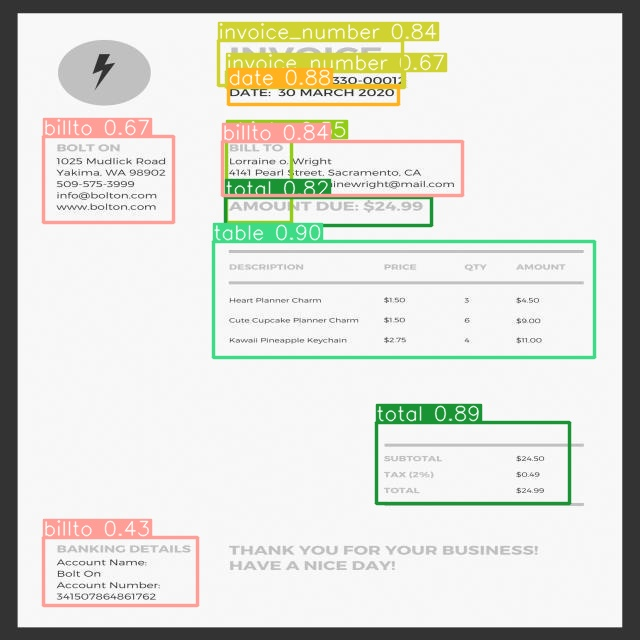

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.40 source=/content/inv1.png save=True

/content
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129067 parameters, 0 gradients

image 1/1 /content/inv1.png: 800x704 1 table, 2 totals, 70.0ms
Speed: 6.0ms preprocess, 70.0ms inference, 2.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


In [ ]:
!git init



Initialized empty Git repository in /content/.git/


In [ ]:
!git add
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .config/.last_opt_in_prompt.yaml
	new file:   .config/.last_survey_prompt.yaml
	new file:   .config/.last_update_check.json
	new file:   .config/active_config
	new file:   .config/config_sentinel
	new file:   .config/configurations/config_default
	new file:   .config/default_configs.db
	new file:   .config/gce
	new file:   .config/logs/2023.06.23/13.39.35.724212.log
	new file:   .config/logs/2023.06.23/13.40.06.305076.log
	new file:   .config/logs/2023.06.23/13.40.34.227331.log
	new file:   .config/logs/2023.06.23/13.40.48.465045.log
	new file:   .config/logs/2023.06.23/13.41.17.388465.log
	new file:   .config/logs/2023.06.23/13.41.18.242949.log
	new file:   sample_data/README.md
	new file:   sample_data/anscombe.json
	new file:   sample_data/california_housing_test.csv
	new file:   sample_data/california_housing_train.csv
	new file:   sample_data/mnist_test.csv
	new f